In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
data = pd.read_csv(r'../data/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.columns = ['total', 'east', 'west'] 
data

/var/folders/c1/1zvkffpn0dbg7l3yf06lz9lw0000gn/T/ipykernel_90837/451856785.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(r'../data/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)


,total,east,west
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...
2023-08-31 19:00:00,224.0,72.0,152.0
2023-08-31 20:00:00,142.0,59.0,83.0
2023-08-31 21:00:00,67.0,35.0,32.0


<Axes: xlabel='Date'>

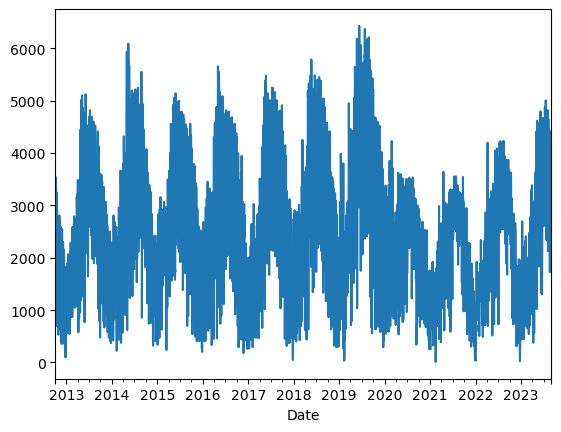

In [86]:
# plot daily traffic

data['total'].resample('D').sum().plot()

**GOAL**: predict daily traffic based on:

- day of the week
- year (upward trend?)
- holidays
- hours of daylight 
- weather (temp, rain, snow, etc.)
- more ideas?

In [87]:
# daily traffic
data = data.resample('D').sum()

In [88]:
# add day of the week, month and year columns

data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month
data['year'] = data.index.year

# covid column
data['covid'] = 0
data.loc[data.index >= '2020-03', 'covid'] = 1 # 0 is pre covid; 1 is post covid

data

,total,east,west,day_of_week,month,year,covid
Date,,,,,,,
2012-10-03,3521.0,1760.0,1761.0,2,10,2012,0
2012-10-04,3475.0,1708.0,1767.0,3,10,2012,0
2012-10-05,3148.0,1558.0,1590.0,4,10,2012,0
2012-10-06,2006.0,1080.0,926.0,5,10,2012,0
2012-10-07,2142.0,1191.0,951.0,6,10,2012,0
...,...,...,...,...,...,...,...
2023-08-27,2169.0,936.0,1233.0,6,8,2023,1
2023-08-28,3027.0,1026.0,2001.0,0,8,2023,1
2023-08-29,2767.0,842.0,1925.0,1,8,2023,1


In [89]:
# add holiday column (0 is not a holiday; 1 is a holiday)
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()

holidays = cal.holidays(start=data.index.min(), end=data.index.max())
data['holiday'] = pd.Series(1, index=holidays)
data['holiday'].fillna(0, inplace=True)
data


,total,east,west,day_of_week,month,year,covid,holiday
Date,,,,,,,,
2012-10-03,3521.0,1760.0,1761.0,2,10,2012,0,0.0
2012-10-04,3475.0,1708.0,1767.0,3,10,2012,0,0.0
2012-10-05,3148.0,1558.0,1590.0,4,10,2012,0,0.0
2012-10-06,2006.0,1080.0,926.0,5,10,2012,0,0.0
2012-10-07,2142.0,1191.0,951.0,6,10,2012,0,0.0
...,...,...,...,...,...,...,...,...
2023-08-27,2169.0,936.0,1233.0,6,8,2023,1,0.0
2023-08-28,3027.0,1026.0,2001.0,0,8,2023,1,0.0
2023-08-29,2767.0,842.0,1925.0,1,8,2023,1,0.0


In [90]:
import numpy as np
# hours of daylight

def get_hourdaylight(date):

    # tilt of Eath's axis
    axis = np.radians(23.44)

    # Seattl's lattitude
    latitude = np.radians(47.61)

    # days since 2000-12-31
    days = (date- pd.to_datetime('2000-12-31')).days

    m = (1 - np.tan(latitude) * np.tan(axis*np.cos(2 * np.pi * days / 365.25)))
    
    return 24 * np.degrees(np.arccos(1 - m)) / 180


<Axes: xlabel='Date'>

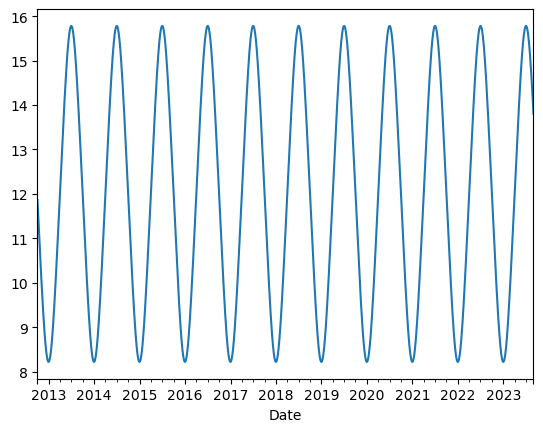

In [91]:
data['hour_of_daylight'] = data.index.map(get_hourdaylight)
data['hour_of_daylight'].plot()

In [92]:
# weather data

weather = pd.read_csv(r'../data/seattle_weather.csv', index_col='DATE', parse_dates=True)
weather

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",16.33,NaN,0.00,0.0,0.0,NaN,66,46,10,20.0,23.0,28.0
2012-10-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",14.54,NaN,0.00,0.0,0.0,NaN,66,47,20,20.0,21.0,25.1
2012-10-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",12.75,NaN,0.00,0.0,0.0,NaN,71,48,360,360.0,17.9,21.9
2012-10-06,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",11.41,NaN,0.00,0.0,0.0,NaN,75,46,20,20.0,17.0,21.0
2012-10-07,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2.91,NaN,0.00,0.0,0.0,NaN,75,46,30,10.0,12.1,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",6.26,NaN,0.00,0.0,0.0,72.0,84,59,210,200.0,12.1,15.0
2023-08-28,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",6.71,NaN,0.00,0.0,0.0,66.0,67,61,220,210.0,12.1,15.0
2023-08-29,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",6.49,NaN,0.12,0.0,0.0,61.0,62,58,70,70.0,12.1,19.0


We'll use:

- PRCP: precipitation 
- TAVG: average temp
- SNOW
- AWND: average wind speed

<Axes: xlabel='DATE'>

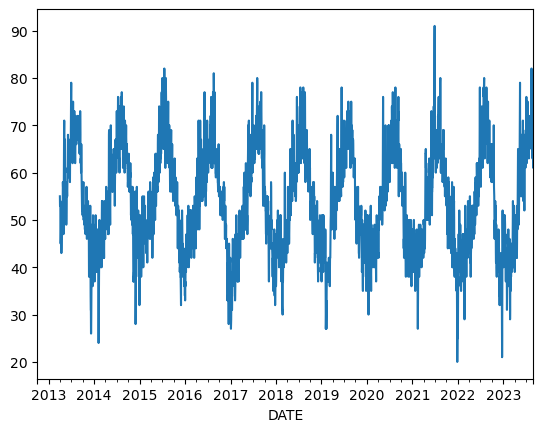

In [93]:
weather.TAVG.plot()

<Axes: xlabel='DATE'>

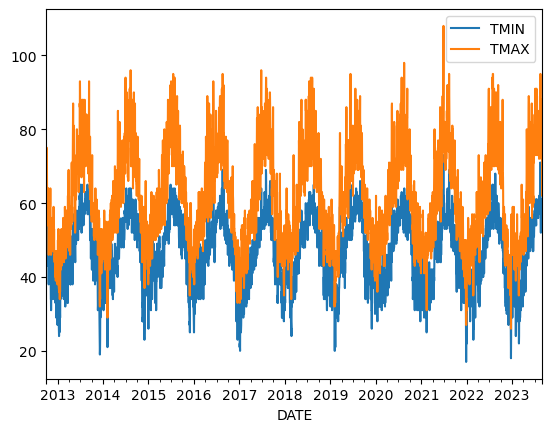

In [94]:
weather[['TMIN', 'TMAX']].plot()

<Axes: xlabel='DATE'>

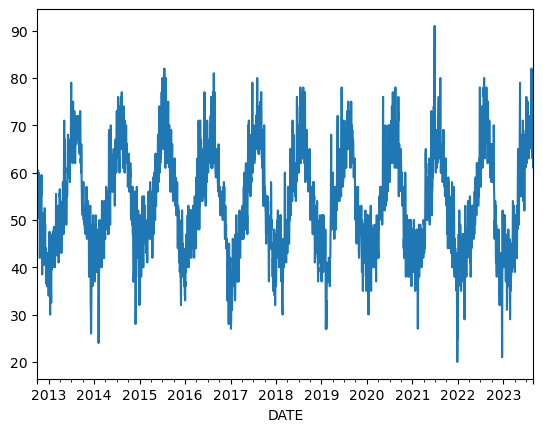

In [95]:
weather.TAVG.fillna((weather.TMIN + weather.TMAX) / 2, inplace=True)
weather.TAVG.plot()

In [96]:
# add weather data columns
data['PRCP'] = weather.PRCP
data['TAVG'] = weather.TAVG
data['SNOW'] = weather.SNOW
data['AWND'] = weather.AWND
data

,total,east,west,day_of_week,month,year,covid,holiday,hour_of_daylight,PRCP,TAVG,SNOW,AWND
Date,,,,,,,,,,,,,
2012-10-03,3521.0,1760.0,1761.0,2,10,2012,0,0.0,11.863813,0.00,56.0,0.0,16.33
2012-10-04,3475.0,1708.0,1767.0,3,10,2012,0,0.0,11.804946,0.00,56.5,0.0,14.54
2012-10-05,3148.0,1558.0,1590.0,4,10,2012,0,0.0,11.746107,0.00,59.5,0.0,12.75
2012-10-06,2006.0,1080.0,926.0,5,10,2012,0,0.0,11.687302,0.00,60.5,0.0,11.41
2012-10-07,2142.0,1191.0,951.0,6,10,2012,0,0.0,11.628541,0.00,60.5,0.0,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,2169.0,936.0,1233.0,6,8,2023,1,0.0,14.020464,0.00,72.0,0.0,6.26
2023-08-28,3027.0,1026.0,2001.0,0,8,2023,1,0.0,13.967394,0.00,66.0,0.0,6.71
2023-08-29,2767.0,842.0,1925.0,1,8,2023,1,0.0,13.913949,0.12,61.0,0.0,6.49


In [97]:
from sklearn.model_selection import train_test_split

X = data.drop(['total', 'east', 'west', 'month'], axis=1)
y = data.total

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Linear regression model

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # numerical and categorical features
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [99]:
X.columns

Index(['day_of_week', 'year', 'covid', 'holiday', 'hour_of_daylight', 'PRCP',
       'TAVG', 'SNOW', 'AWND'],
      dtype='object')

In [100]:
num_features = ['year', 'hour_of_daylight', 'PRCP', 'TAVG', 'SNOW', 'AWND']
cat_features = ['day_of_week', 'covid', 'holiday'] 

num_processor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()), 
    ])

cat_processor = Pipeline([
    ('encoder', OneHotEncoder())
])

feature_processor = ColumnTransformer([
    ('num', num_processor, num_features),
    ('cat', cat_processor, cat_features)
])

pipe = Pipeline([
    ('processor', feature_processor),
    ('poly', PolynomialFeatures(degree=1)), 
    ('lin_reg', LinearRegression())
])

pipe

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'hour_of_daylight',
                                                   'PRCP', 'TAVG', 'SNOW',
                                                   'AWND']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['day_of_week', 'covid',
                                                   'holiday'])])),
                ('poly', PolynomialFeatures(degree=1)),
                ('lin_reg', LinearRegression())])

In [101]:
pipe.fit(X, y)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'hour_of_daylight',
                                                   'PRCP', 'TAVG', 'SNOW',
                                                   'AWND']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['day_of_week', 'covid',
                                                   'holiday'])])),
                ('poly', PolynomialFeatures(degree=1)),
                ('lin_reg', LinearRegression())])

In [102]:
data['predicted'] = pipe.predict(X)
data

,total,east,west,day_of_week,month,year,covid,holiday,hour_of_daylight,PRCP,TAVG,SNOW,AWND,predicted
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,1760.0,1761.0,2,10,2012,0,0.0,11.863813,0.00,56.0,0.0,16.33,2770.0
2012-10-04,3475.0,1708.0,1767.0,3,10,2012,0,0.0,11.804946,0.00,56.5,0.0,14.54,2726.0
2012-10-05,3148.0,1558.0,1590.0,4,10,2012,0,0.0,11.746107,0.00,59.5,0.0,12.75,2590.0
2012-10-06,2006.0,1080.0,926.0,5,10,2012,0,0.0,11.687302,0.00,60.5,0.0,11.41,1686.0
2012-10-07,2142.0,1191.0,951.0,6,10,2012,0,0.0,11.628541,0.00,60.5,0.0,2.91,1858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,2169.0,936.0,1233.0,6,8,2023,1,0.0,14.020464,0.00,72.0,0.0,6.26,2422.0
2023-08-28,3027.0,1026.0,2001.0,0,8,2023,1,0.0,13.967394,0.00,66.0,0.0,6.71,3554.0
2023-08-29,2767.0,842.0,1925.0,1,8,2023,1,0.0,13.913949,0.12,61.0,0.0,6.49,3444.0


<Axes: xlabel='Date'>

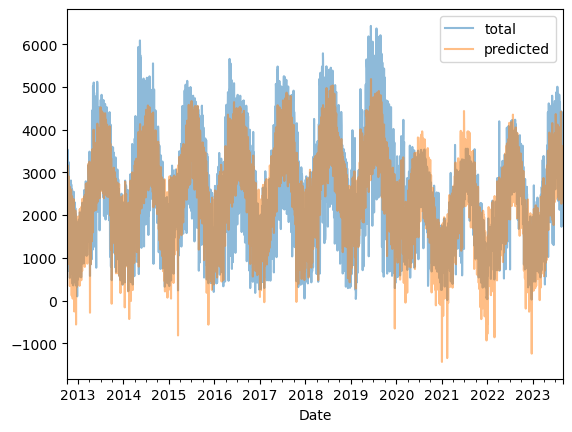

In [103]:
# plot daily trips and predicted trips
data[['total', 'predicted']].plot(alpha=0.5)

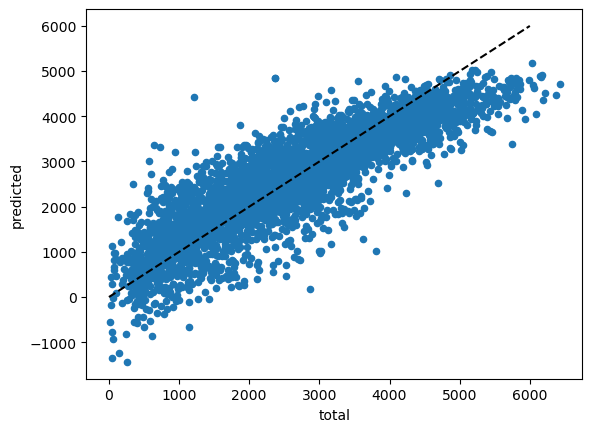

In [104]:
data.plot.scatter(x='total', y='predicted')
plt.plot([0, 6000], [0, 6000], '--k')

<Axes: xlabel='Date'>

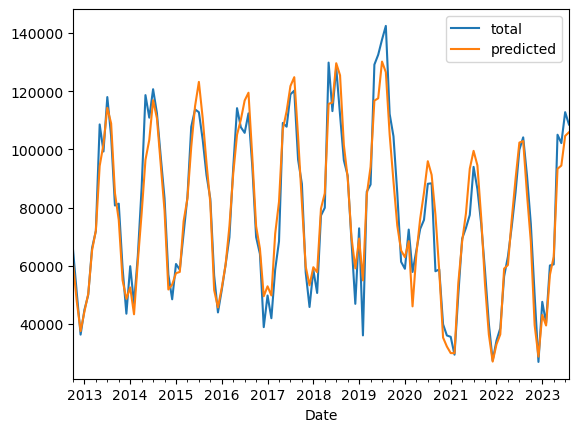

In [105]:
# monthly value
data[['total', 'predicted']].resample('M').sum().plot()

<Axes: xlabel='Date'>

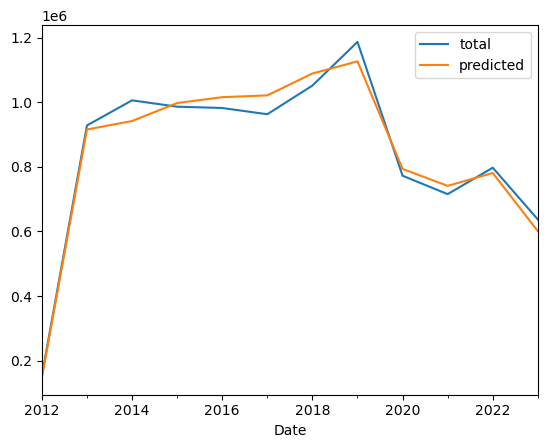

In [106]:
# yearly value
data[['total', 'predicted']].resample('Y').sum().plot()

## coefficients of linear regression with pipeline

In [107]:
pipe['processor'].get_feature_names_out() # all the feature names after the 'processor' step 

array(['num__year', 'num__hour_of_daylight', 'num__PRCP', 'num__TAVG',
       'num__SNOW', 'num__AWND', 'cat__day_of_week_0',
       'cat__day_of_week_1', 'cat__day_of_week_2', 'cat__day_of_week_3',
       'cat__day_of_week_4', 'cat__day_of_week_5', 'cat__day_of_week_6',
       'cat__covid_0', 'cat__covid_1', 'cat__holiday_0.0',
       'cat__holiday_1.0'], dtype=object)

In [108]:
feature_names = pipe['poly'].get_feature_names_out(pipe['processor'].get_feature_names_out()) # more features (when degree > 1)


In [109]:
coeffs = pipe['lin_reg'].coef_
len(feature_names), len(coeffs)

(18, 18)

In [110]:
coefficients = pd.DataFrame(coeffs, index=feature_names, columns=['coefficients'])
coefficients 

,coefficients
1,0.000000e+00
num__year,1.110494e+03
num__hour_of_daylight,1.055386e+03
num__PRCP,-3.281037e+03
num__TAVG,2.641778e+03
num__SNOW,-5.315494e+02
num__AWND,-7.347302e+02
cat__day_of_week_0,2.116805e+15
cat__day_of_week_1,2.116805e+15
cat__day_of_week_2,2.116805e+15


## Regularization + polynomial features + grid search + evaluation

In [111]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso

In [112]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# new pipeline
pipe = Pipeline([
    ('processor', feature_processor),
    ('poly', PolynomialFeatures()), 
    ('lin_reg', Lasso()) # or ridge
])

# grid search
param_dic = {
    'poly__degree': [1, 2, 3],
    'lin_reg__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(pipe, param_grid=param_dic, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) # we want to minimize the MSE in lin reg; scoring = 'neg_mean_squared_error'
grid.fit(X_train, y_train)

/Users/bd/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.880e+06, tolerance: 4.535e+05
  model = cd_fast.enet_coordinate_descent(
/Users/bd/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.879e+06, tolerance: 4.527e+05
  model = cd_fast.enet_coordinate_descent(
/Users/bd/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['year',
                                                                          'hour_of_daylight',
                                                                          'PRCP',
                                                                          'TAVG',
                                                                          'SNOW',
                                                                          'AWND']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['day_of_week',
                                                                          'covid',
                                                                          'holiday'])])),
                                       ('poly', PolynomialFeatures()),
                                       ('lin_reg', Lasso())]),
             n_jobs=-1,
             param_grid={'lin_reg__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                            10, 100, 1000],
                         'poly__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

# Starting notes for 10/23/2023

In [113]:
grid.best_params_

{'lin_reg__alpha': 0.1, 'poly__degree': 3}

In [114]:
best_pipe_reg = grid.best_estimator_

In [117]:
# model evaluation
from sklearn.metrics import mean_squared_error
import numpy as np

y_test_pred = best_pipe_reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)

np.sqrt(mse) # on average, we are off by this many bikes for one (daily) prediction

451.8171067396524

<Axes: xlabel='Date'>

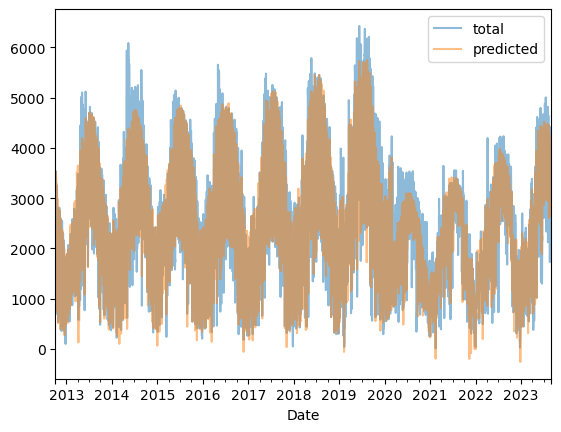

In [119]:
data['predicted'] = best_pipe_reg.predict(X)
data[['total', 'predicted']].plot(alpha=0.5)

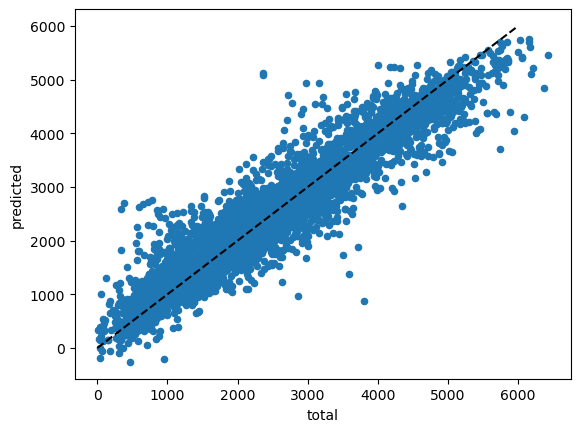

In [121]:
data.plot.scatter(x='total', y='predicted')
plt.plot([0, 6000], [0, 6000], '--k')

Plot looks a bit better/ closer to the true line.